In [172]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
import plotly.express as px
from scipy import stats
pd.set_option('display.float_format', '{:.2f}'.format)

In [266]:
medic = pd.read_csv('df_medic.csv')

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
medic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371396 entries, 0 to 1371395
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   CIP13                         1371396 non-null  object 
 1   NOM COURT                     1371396 non-null  object 
 2   PRODUIT                       1371396 non-null  object 
 3   Code ATC1                     1371396 non-null  object 
 4   Libellé ATC1                  1371396 non-null  object 
 5   Code ATC2                     1371396 non-null  object 
 6   Libellé ATC2                  1371396 non-null  object 
 7   Code ATC3                     1371396 non-null  object 
 8   Libellé ATC3                  1371396 non-null  object 
 9   Code ATC4                     1371396 non-null  object 
 10  Libellé ATC4                  1371396 non-null  object 
 11  Code ATC5                     1371396 non-null  object 
 12  Libellé ATC5                

In [267]:
#DATA CLEANING
medic['CIP13'] = medic['CIP13'].astype(str)
medic['date'] =pd.to_datetime(medic['date'])

In [5]:
medic.head()

,CIP13,NOM COURT,PRODUIT,Code ATC1,Libellé ATC1,Code ATC2,Libellé ATC2,Code ATC3,Libellé ATC3,Code ATC4,Libellé ATC4,Code ATC5,Libellé ATC5,Code EphMRA,Classe EphMRA,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-02-01,16507.0,62898.56,43469.6005
1,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-04-01,15539.0,59318.36,40852.6870
2,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-06-01,15393.0,58724.48,40543.8915
3,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-01-01,17349.0,65889.29,45529.9630
4,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-03-01,17215.0,65560.02,45323.2775


In [6]:
medic.describe()

,Nombre de boites remboursées,Base de remboursement,Montant remboursé
count,1.371396e+06,1.371396e+06,1.371396e+06
mean,1.850270e+04,1.837349e+05,1.499819e+05
std,1.554528e+05,8.674176e+05,7.793441e+05
min,-7.000000e+01,-1.136089e+04,-1.136089e+04
25%,1.750000e+02,2.410950e+03,1.815198e+03
50%,1.849000e+03,2.082376e+04,1.527960e+04
75%,9.365000e+03,9.449663e+04,6.955021e+04
max,1.494251e+07,4.384019e+07,4.380127e+07


## Exploration de la donnée

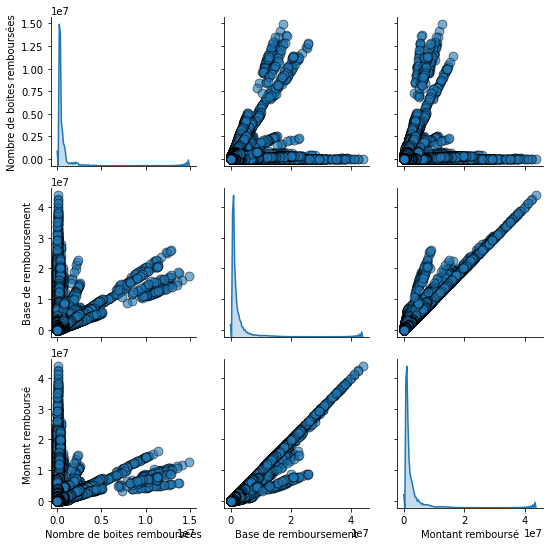

In [7]:
import seaborn as sns
sns.pairplot(medic, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

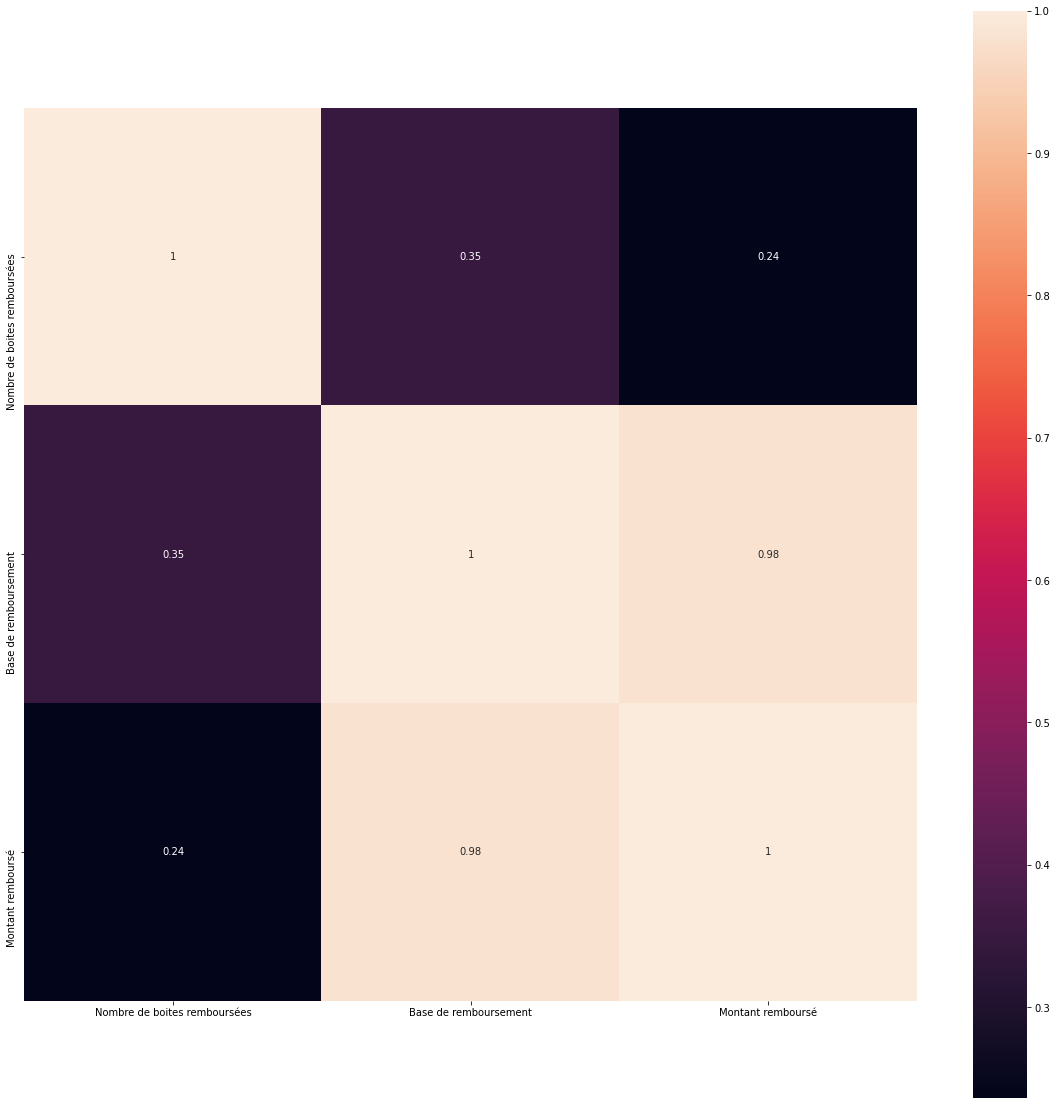

In [10]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(medic.corr(), annot=True, square=True)

In [9]:
corr = medic.corr()
crs =pd.DataFrame(corr.stack().sort_values(ascending = False))
(crs[crs[0]!=1].assign(absolute = np.abs(crs))
    .sort_values(by = 'absolute', ascending= False).head(15))


0  absolute
Montant remboursé            Base de remboursement         0.981928  0.981928
Base de remboursement        Montant remboursé             0.981928  0.981928
                             Nombre de boites remboursées  0.346789  0.346789
Nombre de boites remboursées Base de remboursement         0.346789  0.346789
Montant remboursé            Nombre de boites remboursées  0.236204  0.236204
Nombre de boites remboursées Montant remboursé             0.236204  0.236204

In [12]:
medic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371396 entries, 0 to 1371395
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   CIP13                         1371396 non-null  object        
 1   NOM COURT                     1371396 non-null  object        
 2   PRODUIT                       1371396 non-null  object        
 3   Code ATC1                     1371396 non-null  object        
 4   Libellé ATC1                  1371396 non-null  object        
 5   Code ATC2                     1371396 non-null  object        
 6   Libellé ATC2                  1371396 non-null  object        
 7   Code ATC3                     1371396 non-null  object        
 8   Libellé ATC3                  1371396 non-null  object        
 9   Code ATC4                     1371396 non-null  object        
 10  Libellé ATC4                  1371396 non-null  object        
 11

## Sélection de plusieurs groupes d'études

In [268]:
medic_class = medic[(medic['Libellé ATC2'] == 'ANTIHYPERTENSEURS')|(medic['Libellé ATC5'] == 'J07AM01')|(medic['Code ATC3'] == 'N05B')|(medic['Code ATC3'] == 'N05C')|(medic['Code ATC3'] == 'N06A')| (medic['Code ATC3'] == 'N05A') |(medic['Code ATC4'] == 'N07BB')|(medic['Code ATC4'] == 'N07BC')|(medic['Code ATC4'] == 'C09AA') |(medic['Code ATC4'] == 'C09BA')|(medic['Code ATC4'] == 'C09BB')|(medic['Code ATC4'] == 'C09BX')|(medic['Code ATC4'] == 'C09CA')|(medic['Code ATC4'] == 'C09DA')|(medic['Code ATC4'] == 'C09DB')|(medic['Code ATC4'] == 'C09DX')|(medic['Code ATC4'] == 'C07AA')|(medic['Code ATC4'] == 'C07AB') |(medic['Code ATC4'] == 'C07AG')|(medic['Code ATC4'] == 'C07BA')|(medic['Code ATC4'] == 'C07BB')|(medic['Code ATC4'] == 'C07CA')|(medic['Code ATC4'] == 'C07DA')|(medic['Code ATC4'] == 'C07FB')|(medic['Code ATC2'] == 'A10')|(medic['Code ATC3'] == 'A10A')|(medic['Code ATC3'] == 'A10B')|(medic['Code ATC3'] == 'A10X')|(medic['Code ATC5'] == 'C10AA01')|(medic['Code ATC5'] == 'C10AA03')|(medic['Code ATC5'] == 'C10AA04')|(medic['Code ATC5'] == 'C10AA05')|(medic['Code ATC5'] == 'C10AA06')|(medic['Code ATC5'] == 'C10AA07')|(medic['Code ATC5'] == 'C10BA02')|(medic['Code ATC5'] == 'C10BA05')|(medic['Code ATC5'] == 'C10BA06')|(medic['Code ATC5'] == 'C10BX02')|(medic['Code ATC5'] == 'C10BX03')|(medic['Code ATC4'] == 'B01AA')|(medic['Code ATC4'] == 'B01AB')|(medic['Code ATC4'] == 'B01AC')|(medic['Code ATC5'] == 'C03CA01')|(medic['Code ATC5'] == 'C03EB01')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA06')|(medic['Code ATC5'] == 'J07CA09')|(medic['Code ATC5'] == 'J07BD52')|(medic['Code ATC5'] == 'J07BD53')|(medic['Code ATC4'] == 'J07BM')|(medic['Code ATC4'] == 'J04AM')|(medic['Code ATC2'] == 'J01')|(medic['Code ATC5'] == 'N02AA59')|(medic['Code ATC5'] == 'N02AC54')|(medic['Code ATC5'] == 'N02AX52')|(medic['Code ATC5'] == 'N02BA51')|(medic['Code ATC5'] == 'N02BE01')|(medic['Code ATC5'] == 'N02BE05')|(medic['Code ATC5'] == 'N02BE51')|(medic['Code ATC5'] == 'N02BE71')|(medic['Code ATC5'] == 'M01AE01')|(medic['Code ATC5'] == 'M01AE01')]

In [145]:
medic_class['Classe EphMRA'].value_counts()

STATINES (INHIBITEURS DE LA HMG-CoA REDUCTASE)                                                57108
INHIBITEURS DE L'ENZYME DE CONVERSION NON ASSOCIES                                            55221
ANTAGONISTES DE L'ANGIOTENSINE II NON ASSOCIES                                                48033
BETABLOQUANTS NON ASSOCIES                                                                    46014
ASSOCIATIONS ANTAGONISTES DE L'ANGIOTENSINE II ET ANTIHYPERTENSEURS (C2) ET/OU DIURETIQUES    40587
                                                                                              ...  
ANTI-AGREGANTS PLAQUETTAIRES INHIBITEURS DE LA CYCLO-OXYGENASE                                    9
ANTI-AGREGANTS PLAQUETTAIRES EN ASSOCIATION                                                       9
QUINOLONES NON HALOGENEES A USAGE URINAIRES                                                       9
ANTIHYPERTENSEURS NON ASSOCIES D'ACTION CENTRALE                                                  9


In [146]:
medic_class['Code ATC3'].unique()

array(['C09D', 'A10B', 'C07A', 'C09A', 'C09C', 'C09B', 'C10A', 'B01A',
       'J01M', 'N07B', 'J01F', 'N06A', 'N02A', 'J01A', 'J01D', 'N02B',
       'C07B', 'N05A', 'N05C', 'M01A', 'J07B', 'A10A', 'N05B', 'J01C',
       'J07C', 'J01X', 'C10B', 'J04A', 'C03C', 'J01E', 'C02A', 'J01G',
       'C07F', 'C02C', 'C03E', 'J01R', 'C02L', 'J01B', 'C07D', 'C02D'],
      dtype=object)

In [269]:
def pathologie_5(patho):
   
    if (patho in ['C10AA01', 'C10AA03', 'C10AA04', 'C10AA05', 'C10AA06', 'C10AA07', 'C10BA02', 'C10BA05', 'C10BA06', 'C10BX02', 'C10BX03']) == True:
        return 'Statines'
    if (patho in ['J07CA06', 'J07CA09']) == True:
        return 'Diphtérie_Hæmophilus influenzæ B_coqueluche_poliomyélite_tétanos_hépatite B'
        
    if (patho in ['J07BD52', 'J07BD53']) == True:
        return 'Rougeole en association avec la rubéole'
        
    if (patho in ['C03CA01', 'C03EB01']) == True:
        return 'Furosémide'

    if (patho in ['N02AA59', 'N02AC54', 'N02AX52', 'N02BA51', 'N02BE01', 'N02BE05', 'N02BE51', 'N02BE71']) == True:
        return 'Paracétamol'

    if (patho in ['M01AE01', 'N02AA59']) == True:
        return 'Ibuprofène'   

    if (patho in ['M01AE01', 'N02AA59']) == True:
        return 'Ibuprofène'
    
    if patho == 'J07AM01':
        return 'Vaccins antitétaniques seuls ou associés'

    else:
        return patho
    
pathologie_5('C10AA01')

'Statines'

In [270]:
medic_class['pathologie'] =medic_class['Code ATC5'].apply(pathologie_5)

<ipython-input-270-9293028eab4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_class['pathologie'] =medic_class['Code ATC5'].apply(pathologie_5)


In [271]:
medic_class['pathologie']= np.where(medic_class['Code ATC4']== 'N07BB',"Médicaments utilisés en cas de dépendance à l'alcool",medic_class['pathologie'])
                                
medic_class['pathologie']= np.where(medic_class['Code ATC4']== 'N07BC',"Médicaments utilisés en cas de dépendance aux opiacés",medic_class['pathologie'])

 

<ipython-input-271-07d882d868dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_class['pathologie']= np.where(medic_class['Code ATC4']== 'N07BB',"Médicaments utilisés en cas de dépendance à l'alcool",medic_class['pathologie'])
<ipython-input-271-07d882d868dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_class['pathologie']= np.where(medic_class['Code ATC4']== 'N07BC',"Médicaments utilisés en cas de dépendance aux opiacés",medic_class['pathologie'])


In [150]:
medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(["C09AA", "C09BA","C09BB", "C09BX"]) == True),"Inhibiteurs de l'enzyme de conversion",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['C09CA', 'C09DA', 'C09DB', 'C09DX']) == True),"Sartans",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(["C07AA", 'C07AB', 'C07AG', 'C07BA', 'C07BB', 'C07CA', 'C07DA', 'C07FB']) == True),"Bétabloquants",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['B01AA', 'B01AB']) == True),"Antithrombotiques anticoagulants",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['B01AC']) == True),"Antiagrégants plaquettaires",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['J04AM']) == True),"Associations de médicaments antituberculeux",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['J07BM']) == True),"Vaccin contre Papillomavirus",medic_class['pathologie'])



<ipython-input-150-a33a5fbb834b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(["C09AA", "C09BA","C09BB", "C09BX"]) == True),"Inhibiteurs de l'enzyme de conversion",medic_class['pathologie'])
<ipython-input-150-a33a5fbb834b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_class['pathologie']= np.where((medic_class['Code ATC4'].isin(['C09CA', 'C09DA', 'C09DB', 'C09DX']) == True),"Sartans",medic_class['pathologie'])
<ipython-input-15

In [ ]:
medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['N05B']) == True),"Anxiolytiques",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['N05C']) == True),"Hypnotiques",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['N06A']) == True),"Antidépresseurs",medic_class['pathologie'])
medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['N05A']) == True),"Antipsychotique",medic_class['pathologie'])
medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['A10A']) == True),"Insuline",medic_class['pathologie'])
medic_class['pathologie']= np.where((medic_class['Code ATC3'].isin(['A10B', 'A10X']) == True),"Antidiabétiques non insuliniques",medic_class['pathologie'])

In [ ]:

medic_class['pathologie']= np.where((medic_class['Libellé ATC2'].isin(['ANTIHYPERTENSEURS']) == True),"Antihypertenseur",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC2'].isin(['A10']) == True),"Antidiabétiques",medic_class['pathologie'])

medic_class['pathologie']= np.where((medic_class['Code ATC2'].isin(['B01']) == True),"Antithrombotiques",medic_class['pathologie'])
medic_class['pathologie']= np.where((medic_class['Code ATC2'].isin(['J01']) == True),"Antibiotiques",medic_class['pathologie'])




In [278]:

medic_class['pathologie'].value_counts()



Antibiotiques      86745
Statines           59703
Antidiabétiques    58722
Antipsychotique    43026
Antidépresseurs    39690
                   ...  
C07AA06              129
C07DA06              129
J04AM02              129
J04AM05              129
C09DX04               81
Name: pathologie, Length: 81, dtype: int64

In [275]:
medic_class['pathologie'].unique()


array(['C09DA03', 'C09DA01', 'C09DA06', 'C09DA04', 'C09DA07', 'C09DA08',
       'C09DX04', 'C09DB01', 'C09DB02', 'C09DB04', 'Antidiabétiques',
       'C07AB03', 'C07AB07', 'C07AB02', 'C07AB05', 'C07AB12', 'C07AB04',
       'C07AB08', 'C07AA05', 'C07AA03', 'C07AA07', 'C07AA06', 'C07AA16',
       'C07AA12', 'C07AG02', 'C07AG01', 'C09AA04', 'C09AA07', 'C09AA02',
       'C09AA05', 'C09AA10', 'C09AA01', 'C09AA03', 'C09AA06', 'C09AA09',
       'C09AA15', 'C09CA03', 'C09CA06', 'C09CA04', 'C09CA07', 'C09CA01',
       'C09CA02', 'C09CA08', 'C09BA03', 'C09BA07', 'C09BA09', 'C09BA05',
       'C09BA04', 'C09BA01', 'C09BA02', 'C09BA06', 'C09BA15', 'C09BB02',
       'C09BB04', 'C09BB10', 'C09BX02', 'Statines', 'Antithrombotiques',
       'Antibiotiques',
       'Médicaments utilisés en cas de dépendance aux opiacés',
       "Médicaments utilisés en cas de dépendance à l'alcool",
       'Antidépresseurs', 'Paracétamol', 'C07BB07', 'C07BB12', 'C07BB03',
       'Antipsychotique', 'Hypnotiques', 'Ibupro

In [155]:
medic_class.drop(['CIP13', 'NOM COURT', 'PRODUIT', 'Code ATC1',
       'Libellé ATC2',  'Libellé ATC3', 'Libellé ATC4', 'Libellé ATC5',
       'Classe EphMRA', 'Montant remboursé', 'Base de remboursement' ], axis= 1, inplace = True)

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
medic_class.isna().sum()

Libellé ATC1                    0
Code ATC2                       0
Code ATC3                       0
Code ATC4                       0
Code ATC5                       0
Code EphMRA                     0
date                            0
Nombre de boites remboursées    0
pathologie                      0
dtype: int64

In [158]:
medic_class

,Libellé ATC1,Code ATC2,Code ATC3,Code ATC4,Code ATC5,Code EphMRA,date,Nombre de boites remboursées,pathologie
81438,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-02-01,589.0,Sartans
81439,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-04-01,652.0,Sartans
81440,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-06-01,616.0,Sartans
81441,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-01-01,742.0,Sartans
81442,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-03-01,658.0,Sartans
...,...,...,...,...,...,...,...,...,...
1366522,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-07-01,928.0,Antihypertenseur
1366523,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-10-01,900.0,Antihypertenseur
1366524,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-08-01,881.0,Antihypertenseur
1366525,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-12-01,1020.0,Antihypertenseur


In [160]:
with pd.ExcelWriter('medic_study.xlsx') as writer:
    medic_class.to_excel(writer)

In [241]:
with pd.ExcelWriter('medic_cleaned.xlsx') as writer:
    medic_clean.to_excel(writer)

In [4]:
medic_last = pd.read_excel('medic_cleaned.xlsx')
medic_last

,Unnamed: 0,Libellé ATC1,Code ATC2,Code ATC3,Code ATC4,Code ATC5,Code EphMRA,date,Nombre de boites remboursées,pathologie
0,81438,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-02-01,589,Sartans
1,81439,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-04-01,652,Sartans
2,81440,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-06-01,616,Sartans
3,81441,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-01-01,742,Sartans
4,81442,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-03-01,658,Sartans
...,...,...,...,...,...,...,...,...,...,...
598933,1366522,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-07-01,928,Antihypertenseur
598934,1366523,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-10-01,900,Antihypertenseur
598935,1366524,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-08-01,881,Antihypertenseur
598936,1366525,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-12-01,1020,Antihypertenseur


# AJOUT PLUS DE FEATURES


In [5]:
medic_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598938 entries, 0 to 598937
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    598938 non-null  int64         
 1   Libellé ATC1                  598938 non-null  object        
 2   Code ATC2                     598938 non-null  object        
 3   Code ATC3                     598938 non-null  object        
 4   Code ATC4                     598938 non-null  object        
 5   Code ATC5                     598938 non-null  object        
 6   Code EphMRA                   598938 non-null  object        
 7   date                          598938 non-null  datetime64[ns]
 8   Nombre de boites remboursées  598938 non-null  int64         
 9   pathologie                    598938 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 45.7+ MB


In [6]:
medic_last['year'] = medic_last.date.dt.year

In [7]:
medic_last['month'] = medic_last.date.dt.month

In [8]:
medic_last['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2019, 2020, 2010])

In [10]:
medic_last


,Unnamed: 0,Libellé ATC1,Code ATC2,Code ATC3,Code ATC4,Code ATC5,Code EphMRA,date,Nombre de boites remboursées,pathologie,year,month
0,81438,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-02-01,589,Sartans,2018,2
1,81439,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-04-01,652,Sartans,2018,4
2,81440,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-06-01,616,Sartans,2018,6
3,81441,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-01-01,742,Sartans,2018,1
4,81442,C:ystème cardio-vasculaire,C09,C09D,C09DA,C09DA03,C09D1,2018-03-01,658,Sartans,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...
598933,1366522,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-07-01,928,Antihypertenseur,2010,7
598934,1366523,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-10-01,900,Antihypertenseur,2010,10
598935,1366524,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-08-01,881,Antihypertenseur,2010,8
598936,1366525,C:ystème cardio-vasculaire,C02,C02D,C02DC,C02DC01,C02A2,2010-12-01,1020,Antihypertenseur,2010,12


In [170]:
medic_last.columns

Index(['Unnamed: 0', 'Libellé ATC1', 'Code ATC2', 'Code ATC3', 'Code ATC4',
       'Code ATC5', 'Code EphMRA', 'date', 'Nombre de boites remboursées',
       'pathologie', 'year', 'month'],
      dtype='object')

In [11]:
medic = medic_last.groupby(['pathologie','date', 'year', 'month']).sum()
medic

Unnamed: 0  \
pathologie                   date       year month               
Antibiotiques                2010-01-01 2010 1       552178821   
                             2010-02-01 2010 2       552177042   
                             2010-03-01 2010 3       552178228   
                             2010-04-01 2010 4       552177635   
                             2010-05-01 2010 5       552180007   
...                                                        ...   
Vaccin contre Papillomavirus 2020-05-01 2020 5         6400785   
                             2020-06-01 2020 6         6400797   
                             2020-07-01 2020 7         6400815   
                             2020-08-01 2020 8         6400821   
                             2020-09-01 2020 9         6400827   

                                                    Nombre de boites remboursées  
pathologie                   date       year month                                
Antibiotiques                2010-01-01 2010 1                          10030480  
                             2010-02-01 2010 2                           9996008  
                             2010-03-01 2010 3                           9884592  
                             2010-04-01 2010 4                           8711469  
                             2010-05-01 2010 5                           7695279  
...                                                                          ...  
Vaccin contre Papillomavirus 2020-05-01 2020 5                             48667  
                             2020-06-01 2020 6                             76526  
                             2020-07-01 2020 7                             68172  
                             2020-08-01 2020 8                             59857  
                             2020-09-01 2020 9                             95712  

[2709 rows x 2 columns]

In [244]:
medic['pathologie'].unique()

array(['Antibiotiques', 'Antidiabétiques', 'Antidépresseurs',
       'Antihypertenseur', 'Antipsychotique', 'Antithrombotiques',
       'Anxiolytiques', 'Associations de médicaments antituberculeux',
       'Bétabloquants',
       'Diphtérie_Hæmophilus influenzæ B_coqueluche_poliomyélite_tétanos_hépatite B',
       'Furosémide', 'Hypnotiques', 'Ibuprofène',
       "Inhibiteurs de l'enzyme de conversion",
       'Médicaments utilisés en cas de dépendance aux opiacés',
       "Médicaments utilisés en cas de dépendance à l'alcool",
       'Paracétamol', 'Rougeole en association avec la rubéole',
       'Sartans', 'Satines', 'Vaccin contre Papillomavirus'], dtype=object)

In [12]:
medic =medic.reset_index()

In [13]:
medic

,pathologie,date,year,month,Unnamed: 0,Nombre de boites remboursées
0,Antibiotiques,2010-01-01,2010,1,552178821,10030480
1,Antibiotiques,2010-02-01,2010,2,552177042,9996008
2,Antibiotiques,2010-03-01,2010,3,552178228,9884592
3,Antibiotiques,2010-04-01,2010,4,552177635,8711469
4,Antibiotiques,2010-05-01,2010,5,552180007,7695279
...,...,...,...,...,...,...
2704,Vaccin contre Papillomavirus,2020-05-01,2020,5,6400785,48667
2705,Vaccin contre Papillomavirus,2020-06-01,2020,6,6400797,76526
2706,Vaccin contre Papillomavirus,2020-07-01,2020,7,6400815,68172
2707,Vaccin contre Papillomavirus,2020-08-01,2020,8,6400821,59857


In [14]:
medic.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [15]:
medic = medic.sort_values(by=['date', 'pathologie']).reset_index()

### Ajout de mois - 12 / mois -24 /-36

In [16]:
medic['previous -12'] = medic.groupby([medic['date'].dt.month,medic['date'].dt.day])['Nombre de boites remboursées'].shift(21)

In [17]:
medic['previous -24'] = medic.groupby([medic['date'].dt.month,medic['date'].dt.day])['Nombre de boites remboursées'].shift(42)

In [18]:
medic['previous -36'] = medic.groupby([medic['date'].dt.month,medic['date'].dt.day])['Nombre de boites remboursées'].shift(63)

In [19]:
medic

,index,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36
0,0,Antibiotiques,2010-01-01,2010,1,10030480,nan,nan,nan
1,129,Antidiabétiques,2010-01-01,2010,1,3106029,nan,nan,nan
2,258,Antidépresseurs,2010-01-01,2010,1,4235770,nan,nan,nan
3,387,Antihypertenseur,2010-01-01,2010,1,834844,nan,nan,nan
4,516,Antipsychotique,2010-01-01,2010,1,1320786,nan,nan,nan
...,...,...,...,...,...,...,...,...,...
2704,2192,Paracétamol,2020-09-01,2020,9,43080931,38692047.00,37985633.00,42750974.00
2705,2321,Rougeole en association avec la rubéole,2020-09-01,2020,9,172479,179861.00,172978.00,166633.00
2706,2450,Sartans,2020-09-01,2020,9,2993214,2754055.00,2579950.00,2724698.00
2707,2579,Satines,2020-09-01,2020,9,3684534,3374849.00,3224038.00,3440210.00


In [515]:
medic.isna().sum()

index                             0
pathologie                        0
date                              0
year                              0
month                             0
Nombre de boites remboursées      0
previous -12                    252
previous -24                    504
previous -36                    756
dtype: int64

In [204]:
medic_clean = medic.dropna()

In [205]:
medic_clean

,index,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36
756,36,Antibiotiques,2013-01-01,2013,1,12861808,11306409.00,10976787.00,10030480.00
757,165,Antidiabétiques,2013-01-01,2013,1,5497315,4813891.00,3649882.00,3106029.00
758,294,Antidépresseurs,2013-01-01,2013,1,4951260,4580957.00,4222688.00,4235770.00
759,423,Antihypertenseur,2013-01-01,2013,1,865573,815879.00,787479.00,834844.00
760,552,Antipsychotique,2013-01-01,2013,1,1634035,1472197.00,1301344.00,1320786.00
...,...,...,...,...,...,...,...,...,...
2704,2192,Paracétamol,2020-09-01,2020,9,43080931,38692047.00,37985633.00,42750974.00
2705,2321,Rougeole en association avec la rubéole,2020-09-01,2020,9,172479,179861.00,172978.00,166633.00
2706,2450,Sartans,2020-09-01,2020,9,2993214,2754055.00,2579950.00,2724698.00
2707,2579,Satines,2020-09-01,2020,9,3684534,3374849.00,3224038.00,3440210.00


In [137]:
medic_clean['pathologie'].unique()

array(['Antibiotiques', 'Antidiabétiques', 'Antidépresseurs',
       'Antihypertenseur', 'Antipsychotique', 'Antithrombotiques',
       'Anxiolytiques', 'Associations de médicaments antituberculeux',
       'Bétabloquants',
       'Diphtérie_Hæmophilus influenzæ B_coqueluche_poliomyélite_tétanos_hépatite B',
       'Furosémide', 'Hypnotiques', 'Ibuprofène',
       "Inhibiteurs de l'enzyme de conversion",
       'Médicaments utilisés en cas de dépendance aux opiacés',
       "Médicaments utilisés en cas de dépendance à l'alcool",
       'Paracétamol', 'Rougeole en association avec la rubéole',
       'Sartans', 'Satines', 'Vaccin contre Papillomavirus'], dtype=object)

In [ ]:
#renommer certaine catégorie de médicament

In [206]:
medic_clean['pathologie'] = np.where(medic_clean['pathologie'] == 'Satines', 'Statines', medic_clean['pathologie'])

medic_clean['pathologie'] = np.where(medic_clean['pathologie'] == 'Diphtérie_Hæmophilus influenzæ B_coqueluche_poliomyélite_tétanos_hépatite B', 'Vaccins du nourrisson', medic_clean['pathologie'])



<ipython-input-206-75b56bdb41ed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-206-75b56bdb41ed>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
medic_clean['pathologie'].unique()

array(['Antibiotiques', 'Antidiabétiques', 'Antidépresseurs',
       'Antihypertenseur', 'Antipsychotique', 'Antithrombotiques',
       'Anxiolytiques', 'Associations de médicaments antituberculeux',
       'Bétabloquants', 'Vaccins du nourrisson', 'Furosémide',
       'Hypnotiques', 'Ibuprofène',
       "Inhibiteurs de l'enzyme de conversion",
       'Médicaments utilisés en cas de dépendance aux opiacés',
       "Médicaments utilisés en cas de dépendance à l'alcool",
       'Paracétamol', 'Rougeole en association avec la rubéole',
       'Sartans', 'Statines', 'Vaccin contre Papillomavirus'],
      dtype=object)

In [ ]:
#ajout du de la class ATC1 - groupe le plus large par médicaments

In [207]:
def group_medicament(x):
    if (x in ["Anxiolytiques", "Hypnotiques", "Antidépresseurs", "Antipsychotique", "Médicaments utilisés en cas de dépendance à l'alcool", "Médicaments utilisés en cas de dépendance aux opiacés"]) == True:
        return "Troubles mentaux"
        
    if (x in ["Antihypertenseur", "Inhibiteurs de l'enzyme de conversion", "Sartans", "Bétabloquants", "Antidiabétiques", "Insuline", "Antidiabétiques non insuliniques", "Statines", "Antithrombotiques","Antithrombotiques anticoagulants", "Antiagrégants plaquettaires", "Furosémide"]) == True:
        return 'Pathologies cardiovasculaires et diabète'
    
    if (x in ['Vaccins du nourrisson', 'Rougeole en association avec la rubéole', 'Vaccins antitétaniques seuls ou associés','Vaccin contre Papillomavirus'] )== True:
        return 'Vaccins'
    
    if (x in ['Antibiotiques', 'Associations de médicaments antituberculeux'])== True:
        return 'Antibiotique'

    if (x in ['Paracétamol','Ibuprofène'])== True:
        return "Médicaments en lien éventuel avec l’épidémie de Covid-19"


In [141]:
medic_clean['Description'] = medic_clean['pathologie'].apply(group_medicament)
medic_clean

<ipython-input-141-974d85f7e8aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic_clean['Description'] = medic_clean['pathologie'].apply(group_medicament)


,index,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36,Description
756,36,Antibiotiques,2013-01-01,2013,1,12861808,11306409.00,10976787.00,10030480.00,Antibiotique
757,165,Antidiabétiques,2013-01-01,2013,1,5497315,4813891.00,3649882.00,3106029.00,Pathologies cardiovasculaires et diabète
758,294,Antidépresseurs,2013-01-01,2013,1,4951260,4580957.00,4222688.00,4235770.00,Troubles mentaux
759,423,Antihypertenseur,2013-01-01,2013,1,865573,815879.00,787479.00,834844.00,Pathologies cardiovasculaires et diabète
760,552,Antipsychotique,2013-01-01,2013,1,1634035,1472197.00,1301344.00,1320786.00,Troubles mentaux
...,...,...,...,...,...,...,...,...,...,...
2704,2192,Paracétamol,2020-09-01,2020,9,43080931,38692047.00,37985633.00,42750974.00,Médicaments en lien éventuel avec l’épidémie d...
2705,2321,Rougeole en association avec la rubéole,2020-09-01,2020,9,172479,179861.00,172978.00,166633.00,Vaccins
2706,2450,Sartans,2020-09-01,2020,9,2993214,2754055.00,2579950.00,2724698.00,Pathologies cardiovasculaires et diabète
2707,2579,Statines,2020-09-01,2020,9,3684534,3374849.00,3224038.00,3440210.00,Pathologies cardiovasculaires et diabète


In [142]:
medic_clean['Description'].value_counts()

Pathologies cardiovasculaires et diabète                    744
Troubles mentaux                                            558
Vaccins                                                     279
Antibiotique                                                186
Médicaments en lien éventuel avec l’épidémie de Covid-19    186
Name: Description, dtype: int64

In [208]:
medic_clean= medic_clean[['pathologie', 'date','year', 'month','Nombre de boites remboursées','previous -12', 'previous -24', 'previous -36']]
medic_clean



,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36
756,Antibiotiques,2013-01-01,2013,1,12861808,11306409.00,10976787.00,10030480.00
757,Antidiabétiques,2013-01-01,2013,1,5497315,4813891.00,3649882.00,3106029.00
758,Antidépresseurs,2013-01-01,2013,1,4951260,4580957.00,4222688.00,4235770.00
759,Antihypertenseur,2013-01-01,2013,1,865573,815879.00,787479.00,834844.00
760,Antipsychotique,2013-01-01,2013,1,1634035,1472197.00,1301344.00,1320786.00
...,...,...,...,...,...,...,...,...
2704,Paracétamol,2020-09-01,2020,9,43080931,38692047.00,37985633.00,42750974.00
2705,Rougeole en association avec la rubéole,2020-09-01,2020,9,172479,179861.00,172978.00,166633.00
2706,Sartans,2020-09-01,2020,9,2993214,2754055.00,2579950.00,2724698.00
2707,Statines,2020-09-01,2020,9,3684534,3374849.00,3224038.00,3440210.00


In [209]:
#ajout des jours par mois 
def nombredejoursmois(day):
    if (day in [1, 3, 5, 7, 8, 10, 12] )== True:
        return 31
    if day == 2: 
        return 28
    if (day in [4, 6, 9, 11] )== True:
        return 30

In [145]:
medic_clean['nombre de jour / mois'] = medic_clean['month'].apply(nombredejoursmois)
medic_clean

,Description,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36,nombre de jour / mois
756,Antibiotique,Antibiotiques,2013-01-01,2013,1,12861808,11306409.00,10976787.00,10030480.00,31
757,Pathologies cardiovasculaires et diabète,Antidiabétiques,2013-01-01,2013,1,5497315,4813891.00,3649882.00,3106029.00,31
758,Troubles mentaux,Antidépresseurs,2013-01-01,2013,1,4951260,4580957.00,4222688.00,4235770.00,31
759,Pathologies cardiovasculaires et diabète,Antihypertenseur,2013-01-01,2013,1,865573,815879.00,787479.00,834844.00,31
760,Troubles mentaux,Antipsychotique,2013-01-01,2013,1,1634035,1472197.00,1301344.00,1320786.00,31
...,...,...,...,...,...,...,...,...,...,...
2704,Médicaments en lien éventuel avec l’épidémie d...,Paracétamol,2020-09-01,2020,9,43080931,38692047.00,37985633.00,42750974.00,30
2705,Vaccins,Rougeole en association avec la rubéole,2020-09-01,2020,9,172479,179861.00,172978.00,166633.00,30
2706,Pathologies cardiovasculaires et diabète,Sartans,2020-09-01,2020,9,2993214,2754055.00,2579950.00,2724698.00,30
2707,Pathologies cardiovasculaires et diabète,Statines,2020-09-01,2020,9,3684534,3374849.00,3224038.00,3440210.00,30


In [210]:
#ajout de la température et de l'évolution de la population française
temp_average =  pd.read_excel('temp_average.xlsx')
temp_average = temp_average.dropna()

In [211]:
population = pd.read_excel('population.xlsx')

In [212]:
population

,year,population homme,population femme
0,2013,31.76,33.81
1,2014,32.03,34.10
2,2015,32.16,34.26
3,2016,32.23,34.40
4,2017,32.30,34.48
5,2018,32.34,34.55
6,2019,32.37,34.60
7,2020,32.40,34.67


In [149]:
temp_average.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1 to 96
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 92 non-null     float64
 1   month                92 non-null     float64
 2   average temperature  92 non-null     float64
dtypes: float64(3)
memory usage: 2.9 KB


In [213]:
temp_average['year'] = temp_average['year'].astype(int)
temp_average['month'] = temp_average['month'].astype(int)

In [214]:
temp_average = temp_average.sort_values(by = ['year','month'])
temp_average

,year,month,average temperature
85,2013,1,5.00
86,2013,2,5.70
87,2013,3,8.70
88,2013,4,11.10
89,2013,5,15.00
...,...,...,...
4,2020,4,14.10
5,2020,5,16.50
6,2020,6,18.60
7,2020,7,21.60


In [215]:
medic_clean = pd.merge(medic_clean,temp_average,on=['year','month'],how='left')

In [216]:
medic_clean = pd.merge(medic_clean,population ,on=['year'],how='left')

In [217]:
medic_clean = medic_clean.dropna()

In [218]:
medic_clean

,pathologie,date,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36,average temperature,population homme,population femme
0,Antibiotiques,2013-01-01,2013,1,12861808,11306409.00,10976787.00,10030480.00,5.00,31.76,33.81
1,Antidiabétiques,2013-01-01,2013,1,5497315,4813891.00,3649882.00,3106029.00,5.00,31.76,33.81
2,Antidépresseurs,2013-01-01,2013,1,4951260,4580957.00,4222688.00,4235770.00,5.00,31.76,33.81
3,Antihypertenseur,2013-01-01,2013,1,865573,815879.00,787479.00,834844.00,5.00,31.76,33.81
4,Antipsychotique,2013-01-01,2013,1,1634035,1472197.00,1301344.00,1320786.00,5.00,31.76,33.81
...,...,...,...,...,...,...,...,...,...,...,...
1927,Paracétamol,2020-08-01,2020,8,34753838,35766807.00,37094421.00,40521957.00,22.60,32.40,34.67
1928,Rougeole en association avec la rubéole,2020-08-01,2020,8,109158,121390.00,117607.00,110899.00,22.60,32.40,34.67
1929,Sartans,2020-08-01,2020,8,2556280,2669559.00,2615675.00,2739613.00,22.60,32.40,34.67
1930,Statines,2020-08-01,2020,8,3175581,3310100.00,3290649.00,3499164.00,22.60,32.40,34.67


In [220]:
medic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 1931
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   pathologie                    1932 non-null   object        
 1   date                          1932 non-null   datetime64[ns]
 2   year                          1932 non-null   int64         
 3   month                         1932 non-null   int64         
 4   Nombre de boites remboursées  1932 non-null   int64         
 5   previous -12                  1932 non-null   float64       
 6   previous -24                  1932 non-null   float64       
 7   previous -36                  1932 non-null   float64       
 8   average temperature           1932 non-null   float64       
 9   population homme              1932 non-null   float64       
 10  population femme              1932 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [221]:
medic_dummies = pd.get_dummies(medic_clean, prefix=None, prefix_sep='_', 
                   dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [222]:
medic_dummies = medic_dummies.drop(['date'], axis =1)
medic_dummies

,year,month,Nombre de boites remboursées,previous -12,previous -24,previous -36,average temperature,population homme,population femme,pathologie_Antibiotiques,...,pathologie_Ibuprofène,pathologie_Inhibiteurs de l'enzyme de conversion,pathologie_Médicaments utilisés en cas de dépendance aux opiacés,pathologie_Médicaments utilisés en cas de dépendance à l'alcool,pathologie_Paracétamol,pathologie_Rougeole en association avec la rubéole,pathologie_Sartans,pathologie_Statines,pathologie_Vaccin contre Papillomavirus,pathologie_Vaccins du nourrisson
0,2013,1,12861808,11306409.00,10976787.00,10030480.00,5.00,31.76,33.81,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,1,5497315,4813891.00,3649882.00,3106029.00,5.00,31.76,33.81,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,4951260,4580957.00,4222688.00,4235770.00,5.00,31.76,33.81,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,865573,815879.00,787479.00,834844.00,5.00,31.76,33.81,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,1634035,1472197.00,1301344.00,1320786.00,5.00,31.76,33.81,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,2020,8,34753838,35766807.00,37094421.00,40521957.00,22.60,32.40,34.67,0,...,0,0,0,0,1,0,0,0,0,0
1928,2020,8,109158,121390.00,117607.00,110899.00,22.60,32.40,34.67,0,...,0,0,0,0,0,1,0,0,0,0
1929,2020,8,2556280,2669559.00,2615675.00,2739613.00,22.60,32.40,34.67,0,...,0,0,0,0,0,0,1,0,0,0
1930,2020,8,3175581,3310100.00,3290649.00,3499164.00,22.60,32.40,34.67,0,...,0,0,0,0,0,0,0,1,0,0
